# This creates the same Dendrograms as the previous script, but reduces to three variable:
The chosen variables are:
'pressure', 'precipitation', 'temp_mean'

In [42]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical Clustering
## Dendrogram

#### Create dendrogram and print out cluster tables for given nuber of clusters

In [44]:
def dendroType(methodology, datasetDendro, allData, lastCluster, locationDendro, datasetPlusPleasent):

    distanceMethod = linkage(datasetDendro, method=methodology)
    plt.figure(figsize=(36,12))
    dendrogram(distanceMethod, leaf_rotation=90)
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.suptitle("Dendrogram %s Method_%s_%d_%d" % (methodology, locationDendro, YearMin, YearMax),fontsize=18)
    plt.savefig(os.path.join(path, '2.01 Unguided machine learning 01', 'dendrogram_%s_%s_%d_%d.png' % (methodology, locationDendro, YearMin, YearMax)))
    plt.show()
    
    for n in range (2, lastCluster):
        # dfModel = pleasent.copy()
        datasetPlusPleasent['Clusters'] = fcluster(distanceMethod, n, criterion='maxclust')
        # datasetDendro['Pleasent'] = allData["pleasant_weather"]
        # datasetDendro['Clusters'] = allData["Clusters"]
        # print(datasetDendro)
        print("")
        print(locationDendro.upper()+": "+methodology.upper())
        print(pd.crosstab(datasetPlusPleasent["Pleasent"], datasetPlusPleasent["Clusters"]))
        print("")
        

#### Import datasets and clean data

In [45]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning'

In [46]:
df_weather = pd.read_csv(os.path.join(path, 'Data Sets', 'DATASET weather_prediction_TIDY_TRIM.csv'), index_col = False)
df_pleasent = pd.read_csv(os.path.join(path, 'Data Sets', 'DATASET weather_pleasant_TIDY.csv'), index_col = False)

In [47]:
# subset for plotting
df_weatherSub = df_weather.drop(columns=['DATE'])
df_pleasentSub = df_pleasent.drop(columns=['DATE'])

In [56]:
# select the years and location for assessment
YearMin = 2010
Years = 5
YearMax = YearMin + Years - 1

LocationSub = 'ALL'
# df_YearSub = df_weatherSub[['pressure','precipitation','temp_mean']].loc[(df_weatherSub.YEAR <= YearMax) & (df_weatherSub.YEAR >= YearMin) & (df_weatherSub.LOCATION == LocationSub)]
# df_pleasentYearSub = df_pleasentSub[['pleasant_weather']].loc[(df_weatherSub.YEAR <= YearMax) & (df_weatherSub.YEAR >= YearMin) & (df_weatherSub.LOCATION == LocationSub)]

df_YearSub = df_weatherSub[['cloud_cover', 'wind_speed','humidity','pressure','global_radiation','precipitation','snow_depth','sunshine','temp_mean','temp_min','temp_max']].loc[(df_weatherSub.YEAR <= YearMax) & (df_weatherSub.YEAR >= YearMin)]

df_pleasentYearSub = df_pleasentSub[['pleasant_weather']].loc[(df_weatherSub.YEAR <= YearMax) & (df_weatherSub.YEAR >= YearMin)]
dataset = df_YearSub.dropna(axis=1)

In [57]:
df_YearSub

,cloud_cover,wind_speed,humidity,pressure,global_radiation,precipitation,snow_depth,sunshine,temp_mean,temp_min,temp_max
18263,8.0,2.3,0.93,0.9965,0.18,0.56,0.0,0.0,2.9,-0.2,4.8
18264,3.0,3.0,0.74,1.0193,0.58,0.00,1.0,5.2,-1.5,-4.2,0.4
18265,3.0,1.7,0.75,1.0226,0.61,0.00,0.0,6.3,-3.2,-6.0,1.1
18266,5.0,1.0,0.83,1.0169,0.48,0.00,0.0,3.7,-4.9,-8.3,-3.1
18267,7.0,1.4,0.78,1.0073,0.53,0.04,0.0,4.4,-4.0,-7.1,-1.5
...,...,...,...,...,...,...,...,...,...,...,...
341384,5.0,NaN,0.82,1.0142,0.21,0.41,0.0,3.4,10.7,7.9,13.5
341385,5.0,NaN,0.82,1.0142,0.43,0.41,0.0,3.4,10.7,7.9,13.5
341386,5.0,NaN,0.82,1.0142,0.29,0.41,0.0,3.4,10.7,7.9,13.5
341387,5.0,NaN,0.82,1.0142,0.28,0.41,0.0,3.4,10.7,7.9,13.5


In [58]:
dataset

,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
18263,0.18,0.56,0.0,2.9,-0.2,4.8
18264,0.58,0.00,5.2,-1.5,-4.2,0.4
18265,0.61,0.00,6.3,-3.2,-6.0,1.1
18266,0.48,0.00,3.7,-4.9,-8.3,-3.1
18267,0.53,0.04,4.4,-4.0,-7.1,-1.5
...,...,...,...,...,...,...
341384,0.21,0.41,3.4,10.7,7.9,13.5
341385,0.43,0.41,3.4,10.7,7.9,13.5
341386,0.29,0.41,3.4,10.7,7.9,13.5
341387,0.28,0.41,3.4,10.7,7.9,13.5


In [60]:
scaled_features = StandardScaler().fit_transform(dataset)
scaled_features

array([[-1.24694223,  0.4077845 , -1.18427281, -0.81751772, -0.81614329,
        -0.93370613],
       [-0.81356647, -0.32242829,  0.04551837, -1.33492987, -1.34091882,
        -1.38469709],
       [-0.78106329, -0.32242829,  0.3056665 , -1.53483911, -1.5770678 ,
        -1.31294852],
       ...,
       [-1.12776389,  0.21219179, -0.38017858,  0.09971291,  0.24652715,
        -0.04197401],
       [-1.13859829,  0.21219179, -0.38017858,  0.09971291,  0.24652715,
        -0.04197401],
       [-1.27944541,  0.21219179, -0.38017858,  0.09971291,  0.24652715,
        -0.04197401]])

In [61]:
#Run the PCA model, reducing to 3 components
pca = PCA(n_components=3)
principalComponents3 = pca.fit_transform(scaled_features)

principalComponents3

array([[ 2.19960532,  0.67655901, -0.14309062],
       [ 2.2592072 , -0.97159508,  0.1097227 ],
       [ 2.32317406, -1.24430898,  0.29066735],
       ...,
       [ 0.46650744,  0.87409078, -0.4377007 ],
       [ 0.4709132 ,  0.87835557, -0.44161218],
       [ 0.52818811,  0.93379783, -0.49246151]])

In [62]:
datasetPlusPleasent = dataset

datasetPlusPleasent['Pleasent'] = df_pleasentYearSub['pleasant_weather'].astype(int)
datasetPlusPleasent

,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,Pleasent
18263,0.18,0.56,0.0,2.9,-0.2,4.8,0
18264,0.58,0.00,5.2,-1.5,-4.2,0.4,0
18265,0.61,0.00,6.3,-3.2,-6.0,1.1,0
18266,0.48,0.00,3.7,-4.9,-8.3,-3.1,0
18267,0.53,0.04,4.4,-4.0,-7.1,-1.5,0
...,...,...,...,...,...,...,...
341384,0.21,0.41,3.4,10.7,7.9,13.5,0
341385,0.43,0.41,3.4,10.7,7.9,13.5,0
341386,0.29,0.41,3.4,10.7,7.9,13.5,0
341387,0.28,0.41,3.4,10.7,7.9,13.5,0


#### Name the Dendrogram Methods Required and Run Hierarchical Clustering

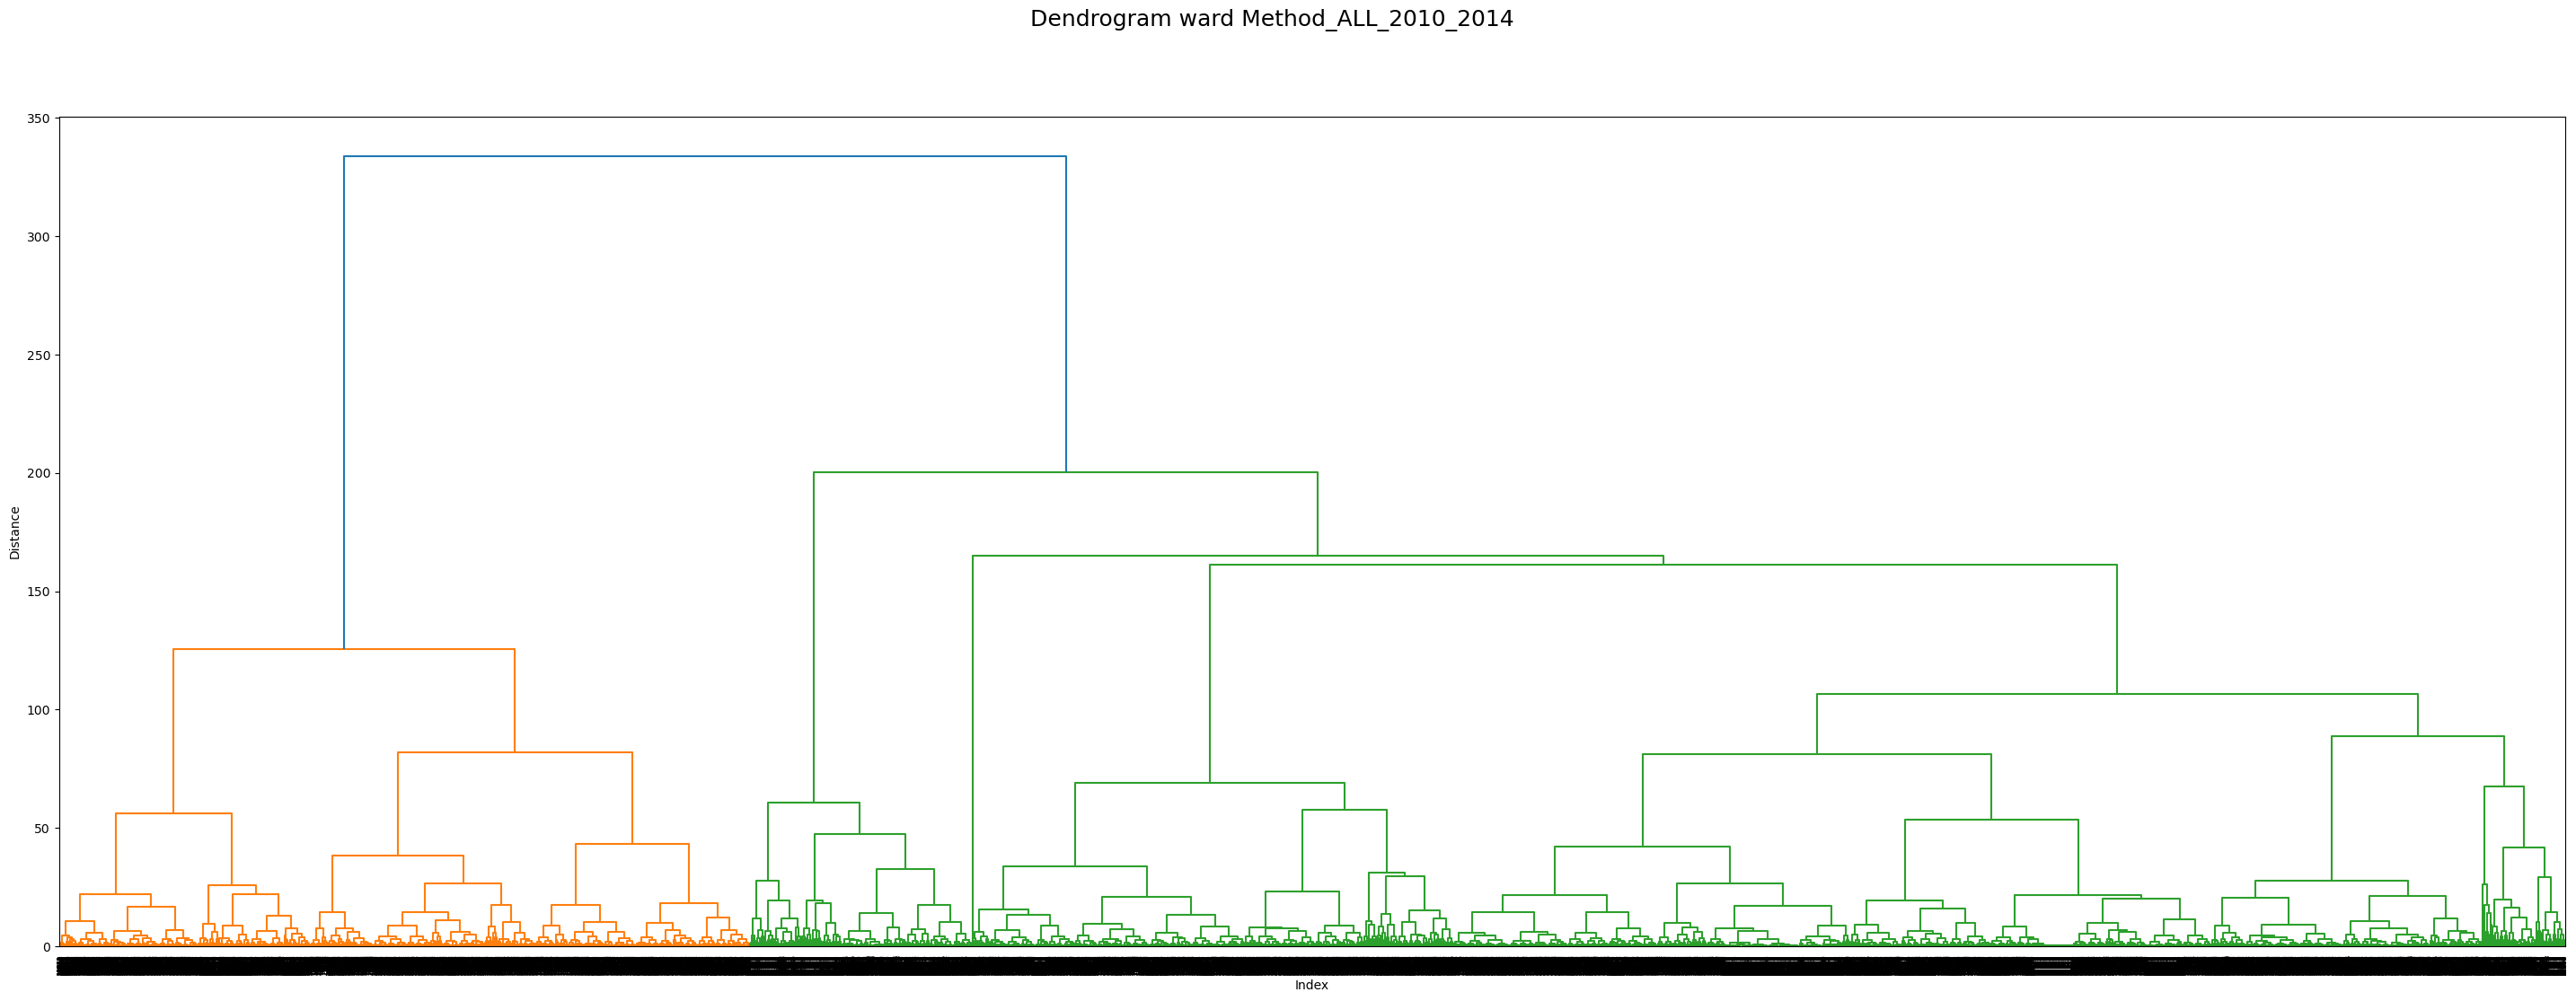


ALL: WARD
Clusters     1      2
Pleasent             
0         2684  18530
1         4868   1308


ALL: WARD
Clusters     1     2      3
Pleasent                   
0         2684  2429  16101
1         4868     0   1308


ALL: WARD
Clusters     1     2      3  4
Pleasent                      
0         2684  2429  16100  1
1         4868     0   1308  0



In [63]:
# methodTypes = ['single', 'average', 'complete', 'ward']
methodTypes = ['ward']
for methodDend in methodTypes:
    dendroType(methodDend, principalComponents3, dataset, 5, LocationSub, datasetPlusPleasent)